# Zomato Bangalore Analysis and Visualization
Zomato is India's largest Food Delivery, Dining and Restaurant Discovery Service. 
Here we are going to analyze the dataset of Zomato which is downloaded rom kaggle.com.
We will try to understand which area has the more demand for dine type restaurants. We will also help person 'x' to open which type of restaurant in Indiranagar. 
We will do a analysis on the dataset to provide some insightful outcomes. 

# Downloading and reading files
 -  Downoad the file from kaggle
 -  Read the datset

In [1]:
import pandas as pd
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

In [2]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Preparation and cleaning
  - Here we will remove unwanted columns
  - We'll also see which columns have numm values

In [5]:
df=df.drop(['menu_item'],axis=1)
df.head()
#We have removed url, phone, address and menu item columns

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51717, 16)

In [9]:
#cleaning rate column
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
# We have to remove 'NEW' and '-' values from the column
import numpy as np 
def filteredRate(value):
  if value=='NEW' or value=='-':
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
df.rate=df.rate.apply(filteredRate)
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
df.rate.isnull().sum()

10052

In [12]:
#instead of null values we wil add the mean of the column
df.rate.fillna(df.rate.mean(),inplace=True)
df.rate.isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [14]:
df.dropna(inplace=True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [15]:
df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'Type'}, inplace=True)
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,costfor2,reviews_list,Type,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [16]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [17]:
df.costfor2.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [18]:
#remove , from the cost
def remcomma(value):
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)
df.costfor2=df.costfor2.apply(remcomma)
df.costfor2.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [19]:
#cleaning rest type
df.rest_type.value_counts()
#as we can see some of the values have only 1 or 2 values. so we can group them and name them as others

Casual Dining                7365
Quick Bites                  5243
Cafe                         2329
Dessert Parlor               1076
Casual Dining, Bar            987
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [20]:
rest_types=df.rest_type.value_counts()
resttypes_lessthan500 = rest_types[rest_types<500]
resttypes_lessthan500

Bar                          357
Bar, Casual Dining           343
Takeaway, Delivery           343
Pub                          327
Lounge                       313
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: rest_type, Length: 67, dtype: int64

In [21]:
#clusturing and naming as other to all the above
def lessRestType(value):
  if value in resttypes_lessthan500:
    return 'Others'
  else:
    return value
df.rest_type=df.rest_type.apply(lessRestType)
df.rest_type.value_counts()

Casual Dining         7365
Others                5552
Quick Bites           5243
Cafe                  2329
Dessert Parlor        1076
Casual Dining, Bar     987
Delivery               670
Name: rest_type, dtype: int64

In [22]:
#Checing location column
df.location.value_counts()
#Here aslo we see that some location have very less restaurants

Koramangala 5th Block    1784
BTM                      1460
Indiranagar              1350
HSR                      1162
Jayanagar                1047
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [23]:
Res=df.location.value_counts()
lessRes=Res[Res<200]

In [24]:
#grouping all the locations having less than 360 restaurants
def locWithLessRes(value):
  if value in lessRes:
    return 'Others'
  else:
    return value
df.location=df.location.apply(locWithLessRes)
df.location.value_counts()

Others                   2483
Koramangala 5th Block    1784
BTM                      1460
Indiranagar              1350
HSR                      1162
Jayanagar                1047
JP Nagar                 1025
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
Koramangala 4th Block     644
MG Road                   596
Brigade Road              570
Church Street             508
Bannerghatta Road         497
Ulsoor                    477
Kalyan Nagar              467
Koramangala 1st Block     467
Bellandur                 462
Sarjapur Road             456
Lavelle Road              445
Residency Road            442
Banashankari              390
Malleshwaram              366
Richmond Road             351
Cunningham Road           333
Electronic City           327
Brookefield               307
St. Marks Road            304
New BEL Road              303
Frazer Town               293
Basavanagudi              286
Kammanahal

In [25]:
#checking cusinies column
df.cuisines.value_counts()

North Indian                                                  1144
North Indian, Chinese                                          777
South Indian                                                   360
Cafe                                                           273
South Indian, North Indian, Chinese                            233
                                                              ... 
Cafe, Salad, Healthy Food, Mexican                               1
Biryani, Chettinad, Chinese                                      1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, South Indian, Juices                      1
Thai, Chinese, Momos                                             1
Name: cuisines, Length: 1687, dtype: int64

In [26]:
cus=df.cuisines.value_counts()
low_cus=cus[cus<70]
low_cus

Italian, Pizza                                                68
Modern Indian                                                 65
Bakery                                                        65
Burger, Fast Food, Beverages                                  64
North Indian, Chinese, Seafood                                64
                                                              ..
Cafe, Salad, Healthy Food, Mexican                             1
Biryani, Chettinad, Chinese                                    1
North Indian, South Indian, Chinese, Desserts, Street Food     1
North Indian, Chinese, South Indian, Juices                    1
Thai, Chinese, Momos                                           1
Name: cuisines, Length: 1643, dtype: int64

In [27]:
#As done above here also we wll create a cluster
def lessCusinies(value):
  if value in low_cus:
    return 'Others'
  else:
    return value
df.cuisines=df.cuisines.apply(lessCusinies)
df.cuisines.value_counts()

Others                                              15959
North Indian                                         1144
North Indian, Chinese                                 777
South Indian                                          360
Cafe                                                  273
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      216
Desserts, Beverages                                   214
Chinese                                               210
Ice Cream, Desserts                                   208
Desserts                                              206
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North Indian, 

In [28]:
#checing Type
df.Type.value_counts()

Delivery              10628
Dine-out               8035
Desserts               1333
Cafes                  1047
Drinks & nightlife      890
Buffet                  762
Pubs and bars           527
Name: Type, dtype: int64

# Exploratory Analysis and Visualization
 - Will analyze the cleaned data
 - Plot graphs and charts to make visualization better

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location Frequency')

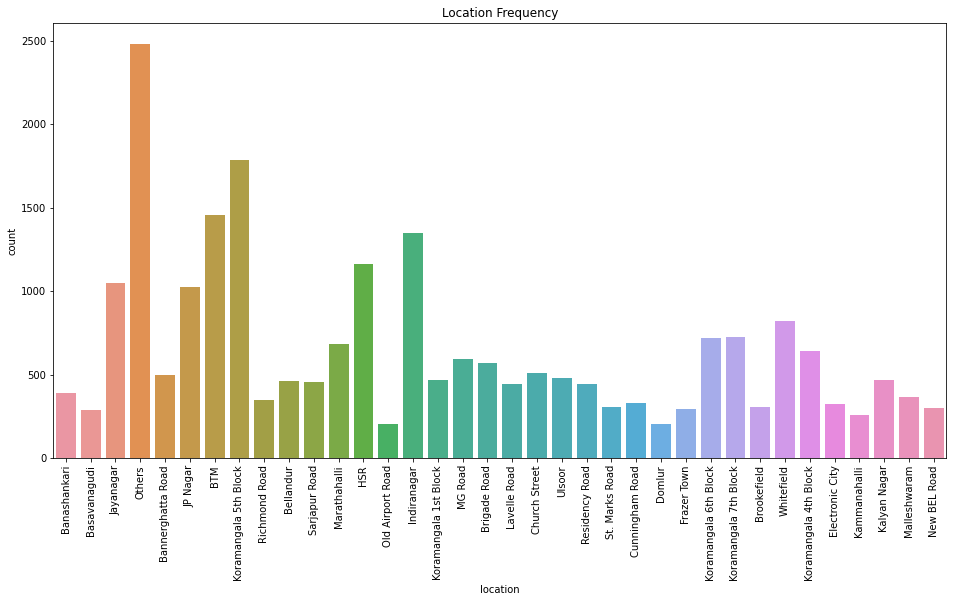

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
ax=sns.countplot(df.location)
plt.xticks(rotation=90)
plt.title('Location Frequency')

In [30]:
#By this graph its clear that the maximum restaurents are there in Koramangala 5th block. So i have have to open a new restaurent then i should not open it there to avoid competitions.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants having online order facility')

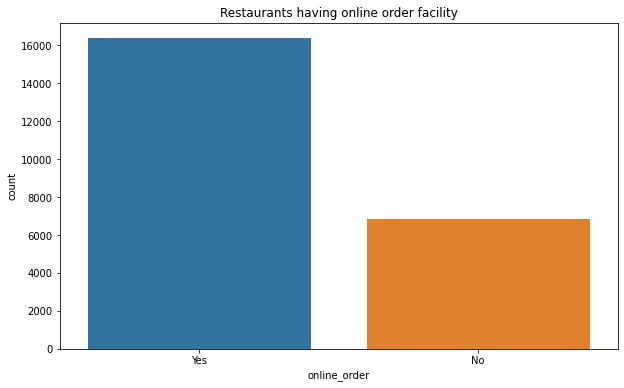

In [31]:
#visulizing the online orer
plt.figure(figsize=(10,6))
sns.countplot(df.online_order )
plt.title('Restaurants having online order facility')

In [32]:
#It is clear from the above graph that more restuarents are having the order online facility 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants having Book table facility')

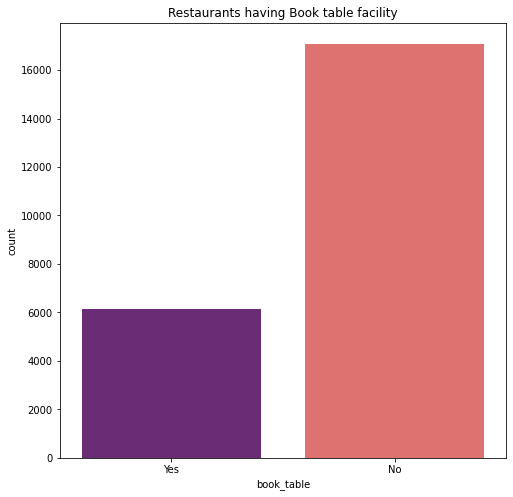

In [33]:
#visualizing book table facility
plt.figure(figsize=(8,8))
sns.countplot(df.book_table, palette='magma')
plt.title('Restaurants having Book table facility')

In [34]:
#It is clear from the above graph that more restuarents are not having the book table facility 

<AxesSubplot:xlabel='online_order', ylabel='rate'>

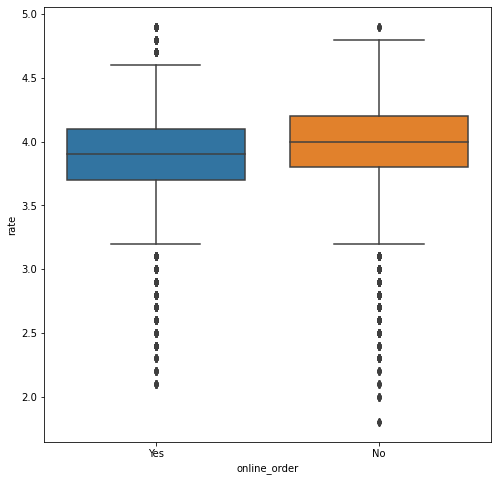

In [35]:
#online order vs rate
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order',y='rate',data=df)
#Analyzing the rating by the customers against the online order facility

In [36]:
# So the above graph states that if the restaurent is having the order online facility their rate is lower than the restuarents which don't have it.
# This can be beacuse of packaging or delivery issues.

<AxesSubplot:xlabel='book_table', ylabel='rate'>

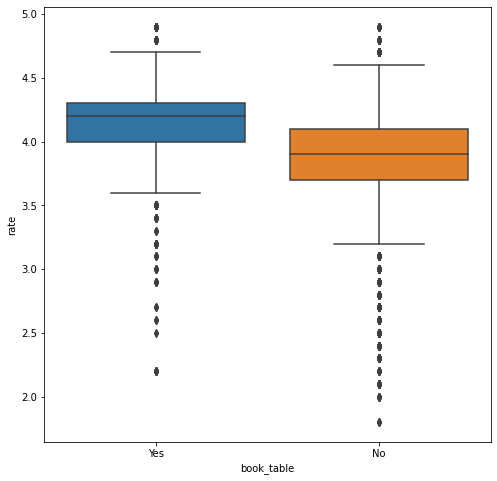

In [37]:
#online book table vs rate
plt.figure(figsize=(8,8))
sns.boxplot(x='book_table',y='rate',data=df)
#Analyzing the rating by the customers against the book table facility

In [38]:
# The above graph shows that the restaurents that have the booking table facility have much higher rate than the restaurents that don't have it.
# So this emplies that restaurents should provide a book table facility to attract more coustomers.

Text(0.5, 1.0, 'Restaurants providing online order according to location')

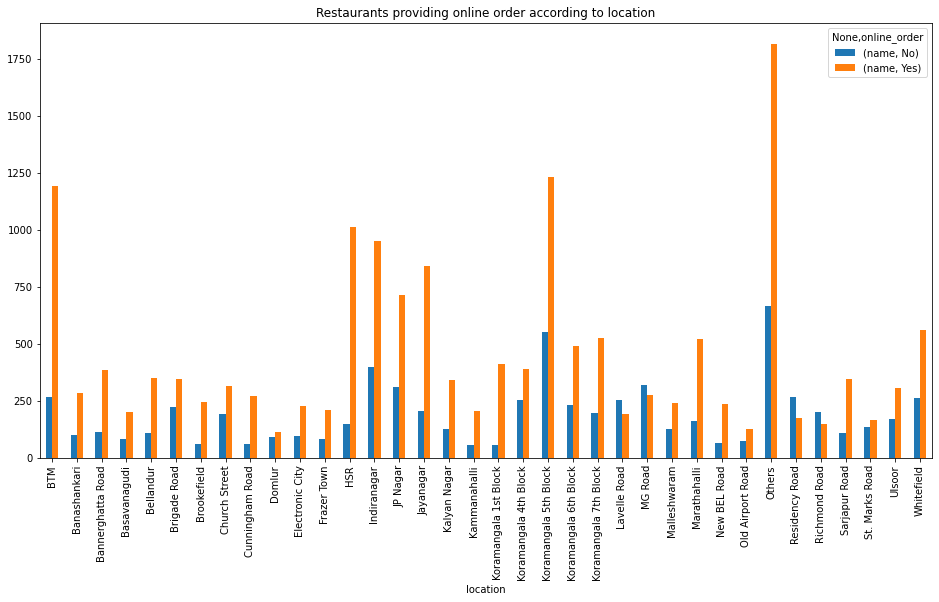

In [39]:
#online order facility by location wise
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_onlinedata.csv')
df1=pd.read_csv('location_onlinedata.csv')
df1=pd.pivot_table(df1,values=None , index=['location'],columns=['online_order'],fill_value=0, aggfunc=np.sum)
df1.plot(kind='bar', figsize=(16,8))
plt.title('Restaurants providing online order according to location')

In [40]:
# By this graph we can understand that in Lavelle Road , MG Road, Residency Road and Richmond Road the amount of online order taking restaurents are less.
# These areas can provide online orders to maximize their sale. 

Text(0.5, 1.0, 'Restaurants providing book table facility according to location')

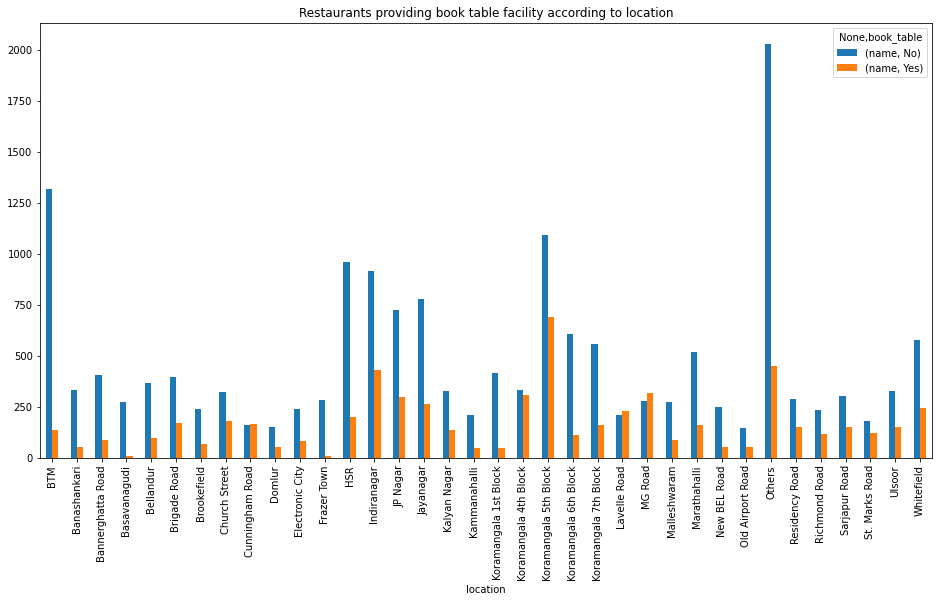

In [41]:
#Book table facility by location wise
df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_bookdata.csv')
df2=pd.read_csv('location_bookdata.csv')
df2=pd.pivot_table(df2,values=None , index=['location'],columns=['book_table'],fill_value=0, aggfunc=np.sum)
df2.plot(kind='bar', figsize=(16,8))
plt.title('Restaurants providing book table facility according to location')

In [42]:
# Lavelle Road and MG road have more restaurents that have book table facility. So retsurents who provide online orders here will be in much more profit beacuse of less competitions

<AxesSubplot:xlabel='Type', ylabel='rate'>

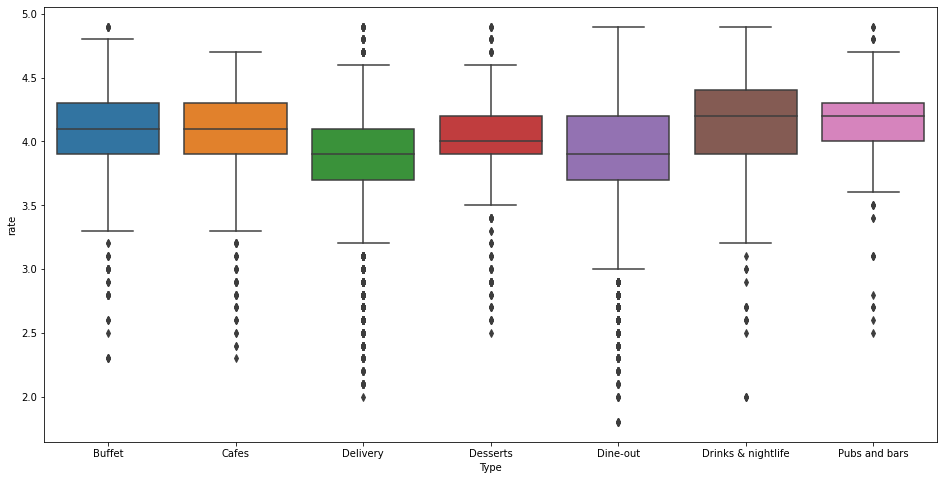

In [43]:
#Visualizing types of resturants
plt.figure(figsize=(16,8))
sns.boxplot(x='Type',y='rate',data=df)

In [44]:
# The above graph shows that people are more attracted to Drinks & nightlife type of restaurents in bangalore.

In [45]:
#Type of restaurants by location wise
df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Typedata.csv')
df3=pd.read_csv('location_Typedata.csv')
df3=pd.pivot_table(df3,values=None , index=['location'],columns=['Type'],fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    36      884       51      456   
Banashankari               7    24      191       19      141   
Bannerghatta Road          8    19      252       28      180   
Basavanagudi               4    10      136       15      116   
Bellandur                 26    11      211       22      165   
Brigade Road              20    20      202       42      213   
Brookefield                6    15      150       14      118   
Church Street             19    40      178       23      197   
Cunningham Road           23    23      145       17      110   
Domlur                    14     4       98       11       61   
Electronic City           17    11      126       15      134   
Frazer Town                1     7      184       21       77   
HSR                       17    36      759       54      270   
Indiranagar               36    81      668       87      358   
JP Nagar                  34    51      470       63      356   
Jayanagar                 25    55      572       72      311   
Kalyan Nagar               9    27      193       33      187   
Kammanahalli               2    10      131        9      106   
Koramangala 1st Block      3    18      269       17      148   
Koramangala 4th Block     16    39      259       41      209   
Koramangala 5th Block     65   124      710      148      601   
Koramangala 6th Block     18    36      315       44      258   
Koramangala 7th Block     25    26      277       68      287   
Lavelle Road              29    22      101       29      178   
MG Road                   44    43      144       29      256   
Malleshwaram              11    14      119       27      163   
Marathahalli              27     8      354       18      251   
New BEL Road               4    20      157       14       93   
Old Airport Road          10     2       87       11       73   
Others                    82    94     1251      123      838   
Residency Road            20    20      111       42      191   
Richmond Road             54    10       86       25      164   
Sarjapur Road             26    11      207       25      146   
St. Marks Road             5    10      101       10      120   
Ulsoor                    16    43      170       27      184   
Whitefield                21    27      360       39      319   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9             6  
Banashankari                           8             0  
Bannerghatta Road                      8             2  
Basavanagudi                           5             0  
Bellandur                             15            12  
Brigade Road                          53            20  
Brookefield                            4             0  
Church Street                         31            20  
Cunningham Road                       11             4  
Domlur                                10             8  
Electronic City                       12            12  
Frazer Town                            1             2  
HSR                                   12            14  
Indiranagar                           62            58  
JP Nagar                              45             6  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           2             0  
Koramangala 1st Block                  7             5  
Koramangala 4th Block                 52            28  
Koramangala 5th Block                 84            52  
Koramangala 6th Block                 36            13  
Koramangala 7th Block                 20            22  
Lavell

Text(0.5, 1.0, 'Type of Restaurants according to location')

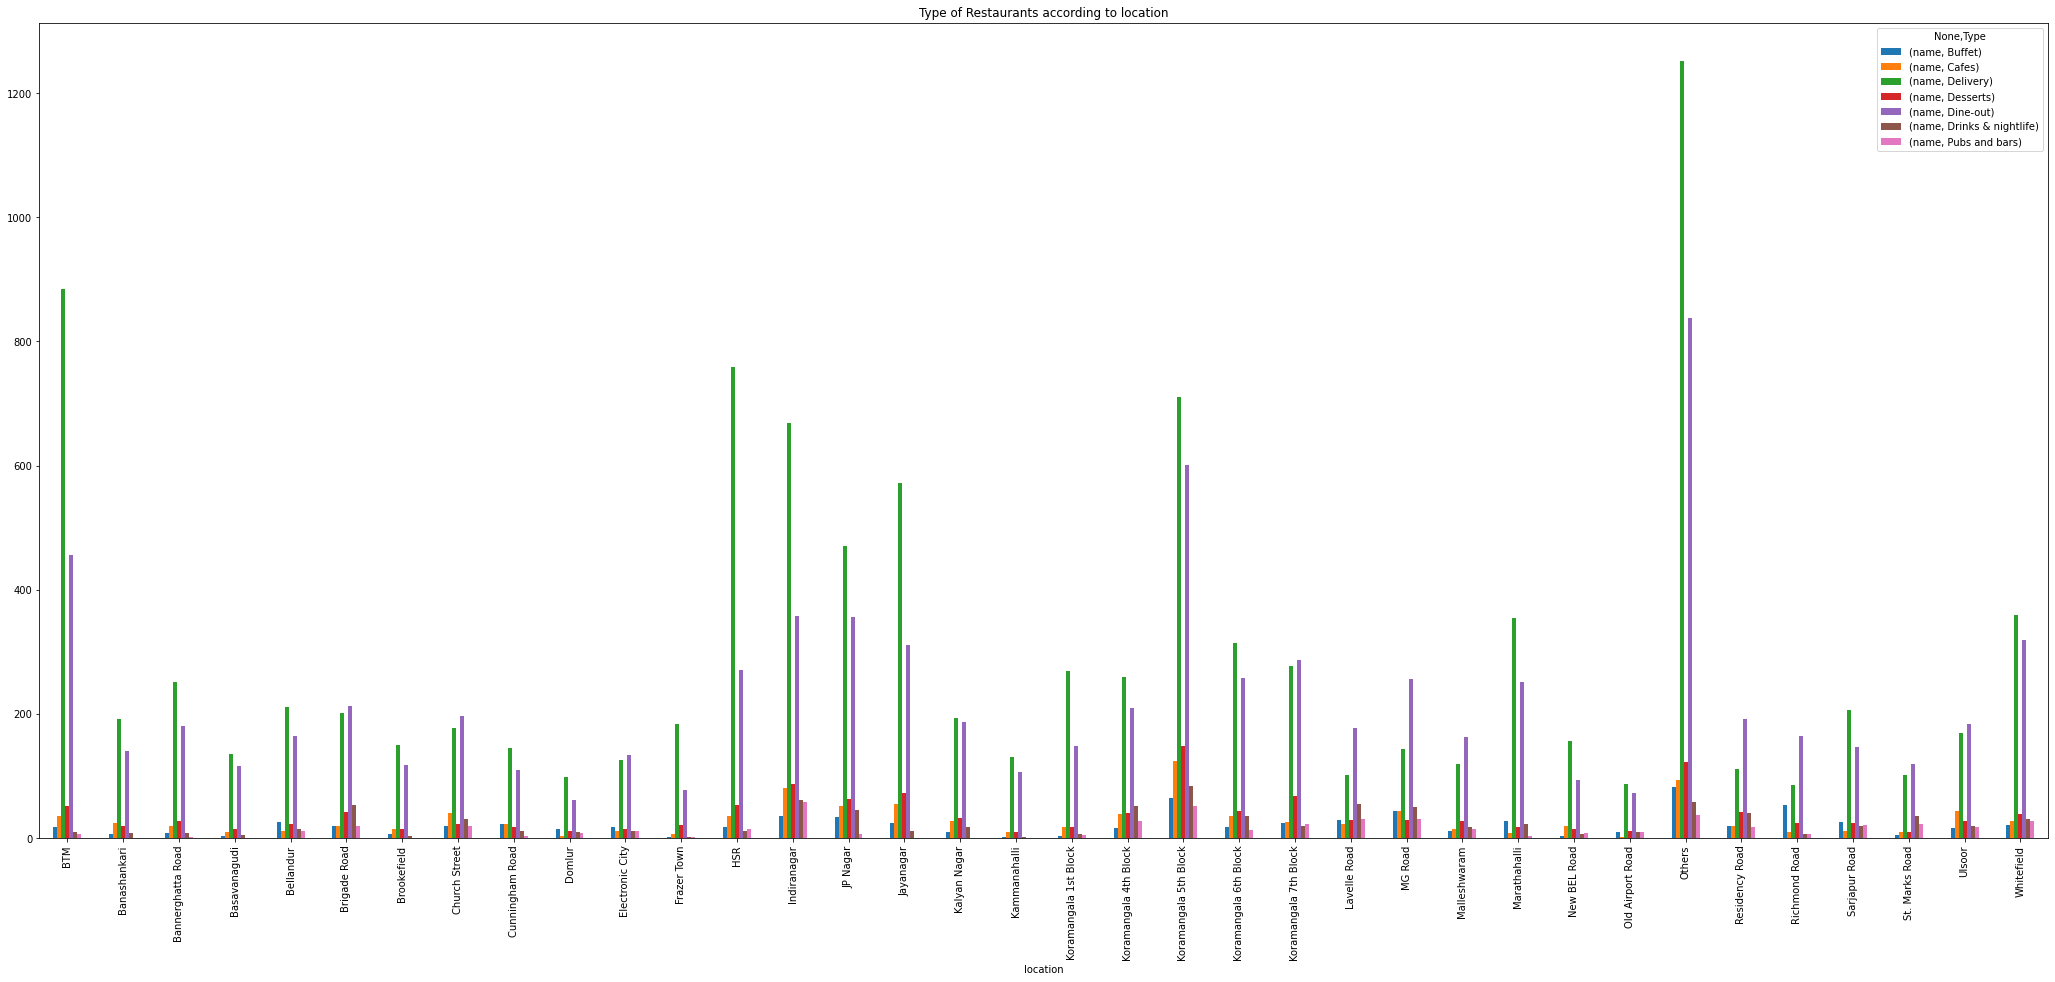

In [46]:
df3.plot(kind='bar', figsize=(36,15))
plt.title('Type of Restaurants according to location')

In [47]:
# The above graph shows what type of restaurants is more popuplar in the specific location.

In [48]:
#cost for 2 according to location
df4=df[['location','costfor2']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['costfor2'].mean()
df5=df5.to_frame()
df5=df5.sort_values('costfor2',ascending=False)
df5.head(5)

,costfor2
location,
MG Road,1465.016779
Lavelle Road,1425.505618
Richmond Road,1124.786325
Residency Road,1095.248869
Ulsoor,1073.375262


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean cost of 2 person according to location')

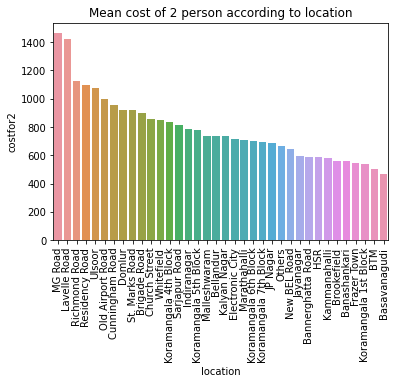

In [49]:
sns.barplot(df5.index,df5.costfor2)
plt.xticks(rotation=90)
plt.title('Mean cost of 2 person according to location')

In [50]:
# The avove graphs shows that average cost for 2 in MG ROAD is highest followed by Lavelle Road.

# Asking and Answering Questions

#### Q1. How many restaurants have dining facility

In [51]:
df.book_table.value_counts()


No     17086
Yes     6136
Name: book_table, dtype: int64

In [52]:
#So we can see most of the restaurants dont have dining facility.

#### Q2.How many restaurants have online order facility

In [53]:
df.online_order.value_counts()


Yes    16376
No      6846
Name: online_order, dtype: int64

In [54]:
#So we can see most of the restaurants have online order facility facility available. Which tells us about our online order coustomers can be increased.

#### Q3. What are the Top 3 restaurants according to orders.

<AxesSubplot:>

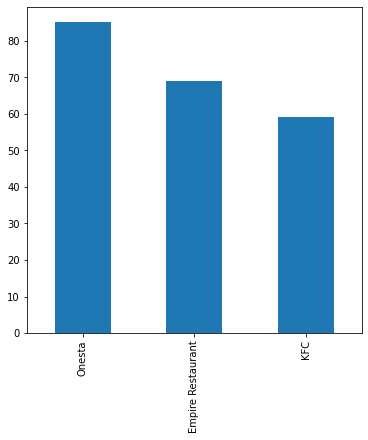

In [55]:
top3res=df.name.value_counts().head(3)
top3res.plot(kind='bar', figsize=(6,6))
#Here onesta is the most favourite restaurant

In [56]:
# Onesta have received the maximum amount of online orders.

#### Q4. What is the maximum type of restauant in Indiranagar

In [57]:
max_indiranagar=df.iloc[13:14,:]
max

<function max>

In [58]:
#This is a tabular representation to view it together in specific numbers.

#### Q5. What is the cheapest location when it comes to restaurants.

In [59]:
df5.sort_values('costfor2',ascending=True).head(1)

,costfor2
location,
Basavanagudi,466.783217


In [60]:
# BASAVANAGUDI location has the lowest cost for 2 price. 

# Inferences and Conclusion

 - The most number of restaurants are in Koramangala 5th Block
 - Above 16000 restaurants have online order facility and nearly 6800 restaurants are still not taking online orders
 - About 6000 restaurants have dining facility but majority don't have it.
 - Maximum rating which is around 4.8 is from the restaurants that don't have online order facility and the resturents which have online order facility have a rating of 4.6
 - Restuarants that have dining facility have more rating(4.7) 
 - Resturents which don't have dining faclity have min/poor rating(3.1)
 - Lavelle Road, MG Road, Residency Road, Richmond Road have more outlets that don't provide online orders as compared to the outlets that take online orders.
 - Koramangala 5th Block has the most number of restaurents that provide the option of booking table.
 - Drinks & nightlife and Dine-out are the most preffered choices of the people.
 - MG road is the most expensive when it comes to average of all the restaurant's cost of 2.
 




# References and Future Work

#### References: 
- https://www.geeksforgeeks.org/style-plots-using-matplotlib/
- www.kaggle.com
- https://www.w3schools.com/python
- https://seaborn.pydata.org/index.html

#### Future work
- Will analyse dataset of heathcare industry
- Will analyse dataset of sales industry
